#  MINI PROJECT ON SVM 

# KUNDA SUCHITRA, VIGNESHWARA C
# 18BTRCR024, 18BTRCR049

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics


data = pd.read_csv('D:\winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [16]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [18]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total sulfur dioxide   -0.700357
free sulfur dioxide    -0.471644
residual sugar         -0.348821
citric acid            -0.187397
quality                -0.119323
good                   -0.087479
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile acidity        0.653036
dtype: float64

In [80]:
print('Shape of Data :: ',data.shape)

Shape of Data ::  (6497, 14)


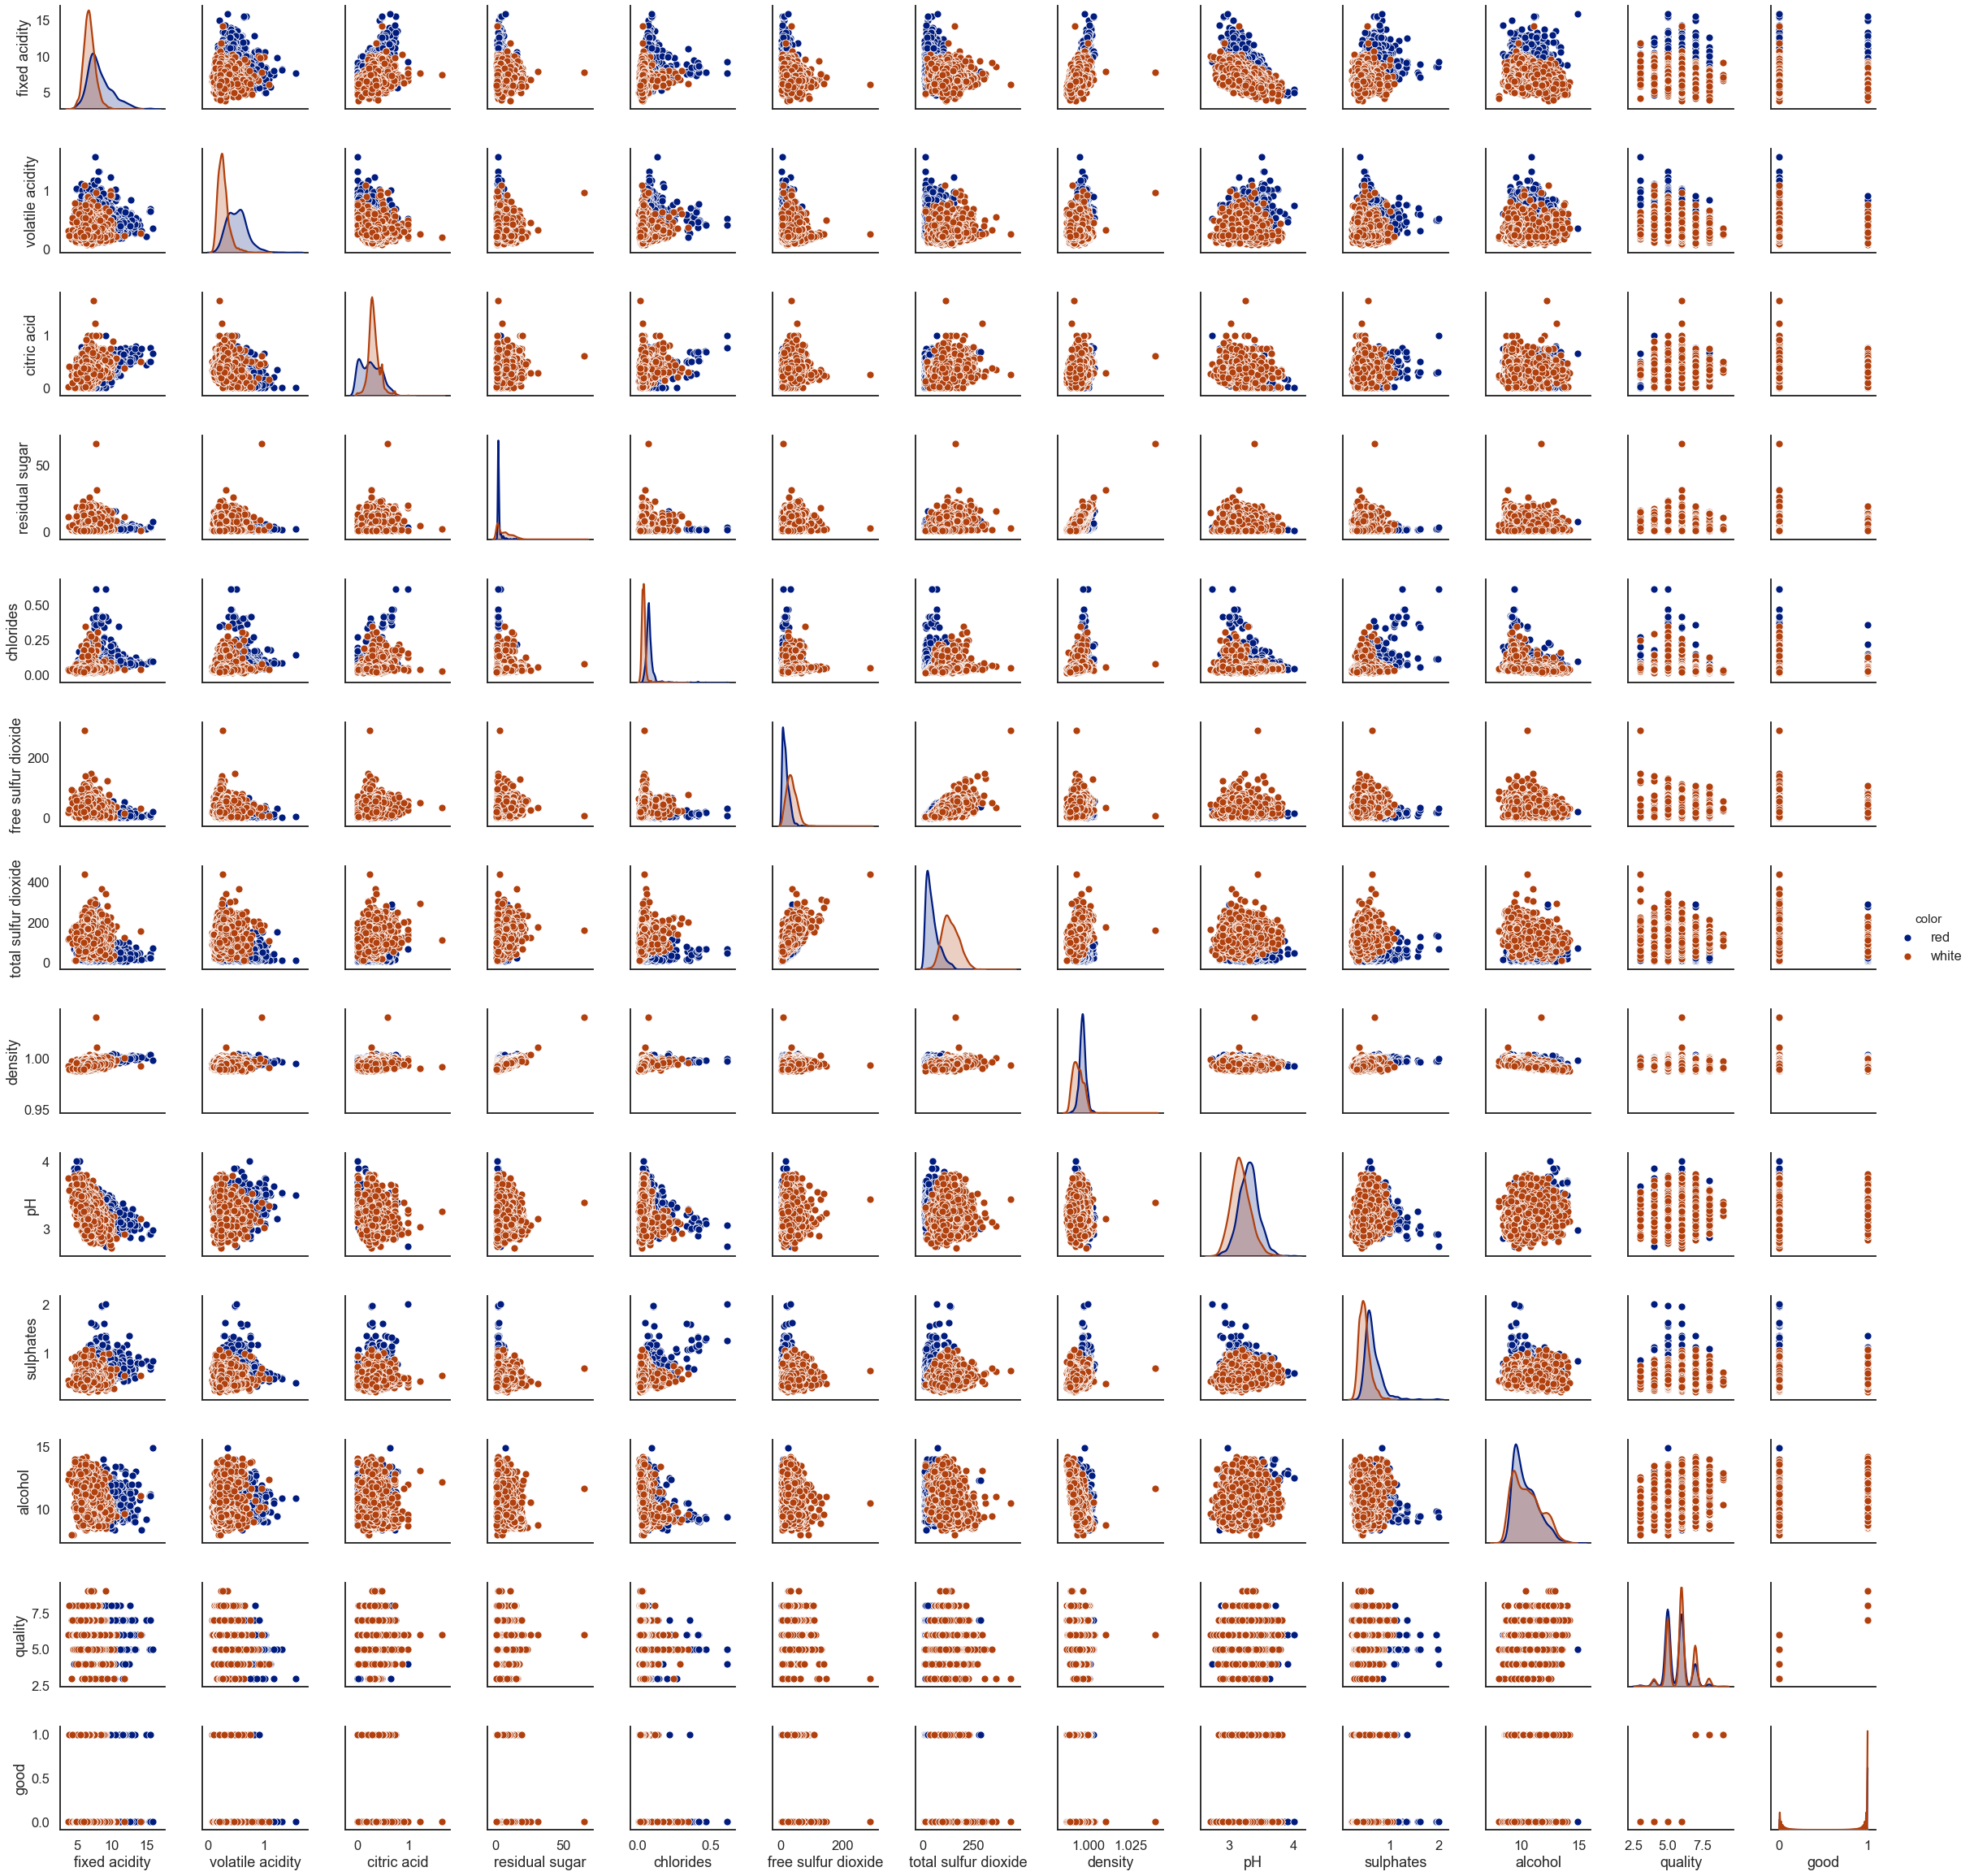

In [19]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data, hue='color')

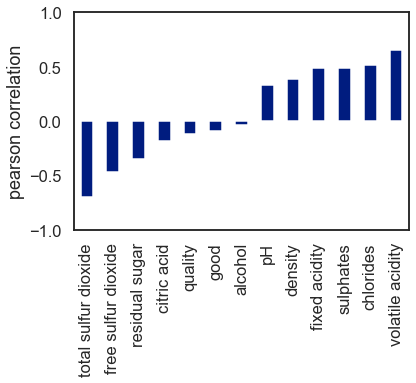

In [20]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [21]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile acidity', 'total sulfur dioxide'], dtype='object')
Index(['volatile acidity_scaled', 'total sulfur dioxide_scaled'], dtype='object')


## Linear SVC :

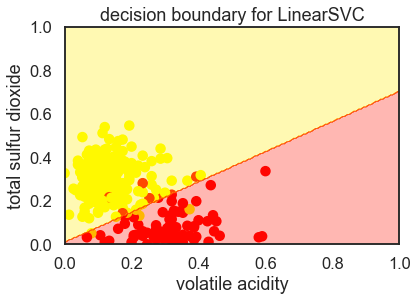

In [22]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)


x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)


ax.set(xlabel=fields[0], ylabel=fields[1],
              xlim=[0, 1], ylim=[0, 1],
              title='decision boundary for LinearSVC');

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y2_LSVC_model = LSVC.predict(X)
print("LSVC Accuracy :", accuracy_score(y, y2_LSVC_model))

LSVC Accuracy : 0.9545944281976296


## Gaussian kernel :

In [24]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    
    ax.set(xlabel=fields[0], ylabel=fields[1], title=str(estimator))

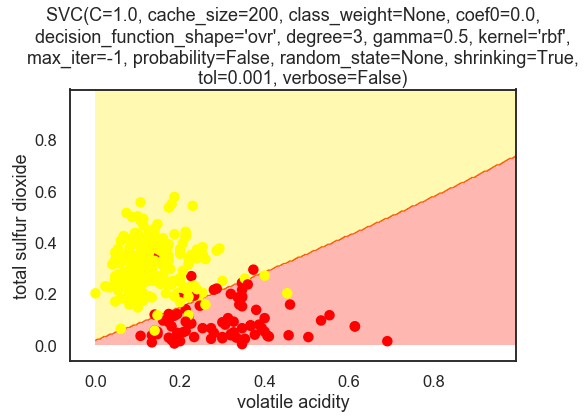

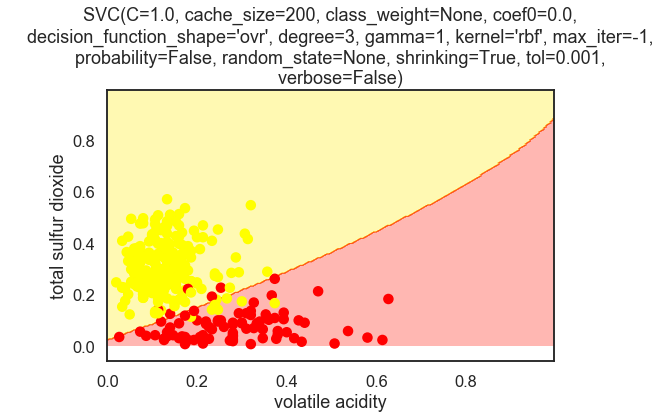

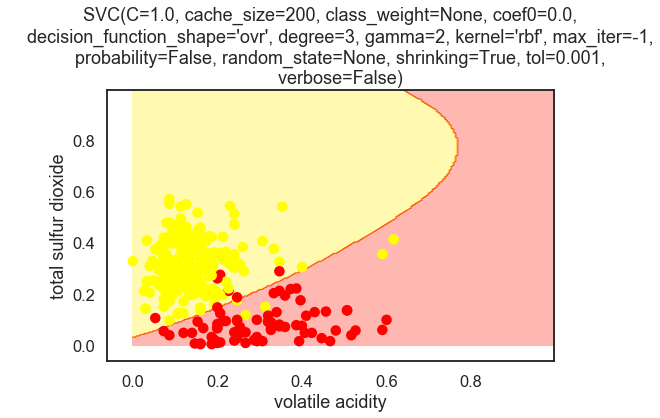

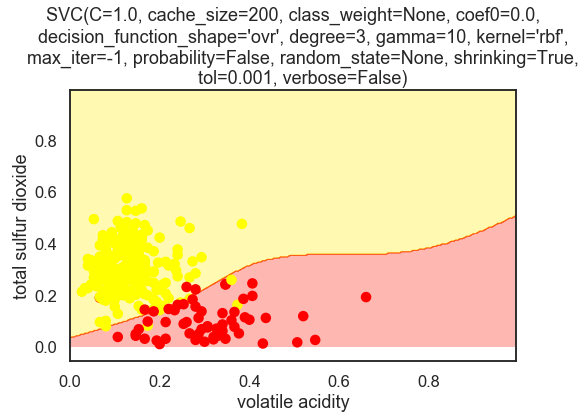

In [25]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

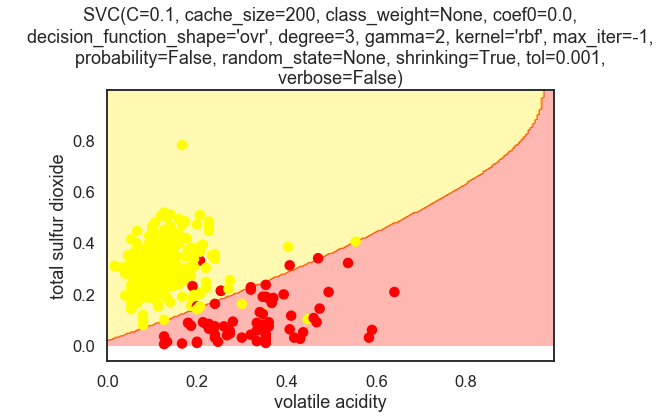

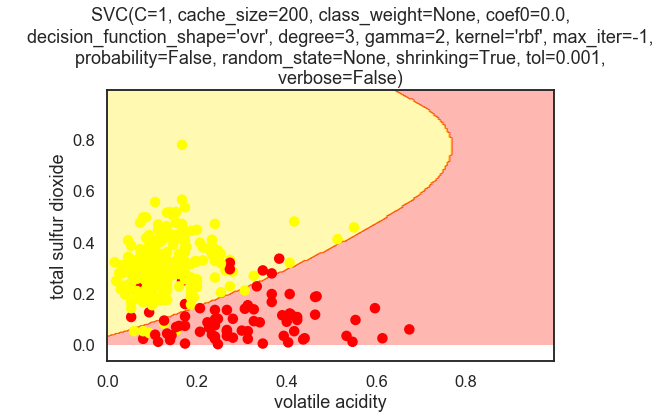

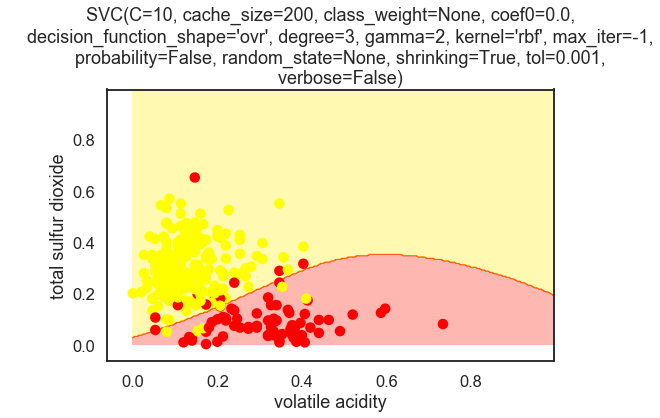

In [26]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [27]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)

In [28]:
from sklearn.model_selection import GridSearchCV 
   
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.952, total=   0.0s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.953, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.954, total=   0.1s
[CV] C=0.1, gamma=2, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=2, kernel=rbf, score=0.952, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [30]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1447
           1       0.92      0.90      0.91       503

    accuracy                           0.95      1950
   macro avg       0.94      0.94      0.94      1950
weighted avg       0.95      0.95      0.95      1950



## Polynomial Kernel :

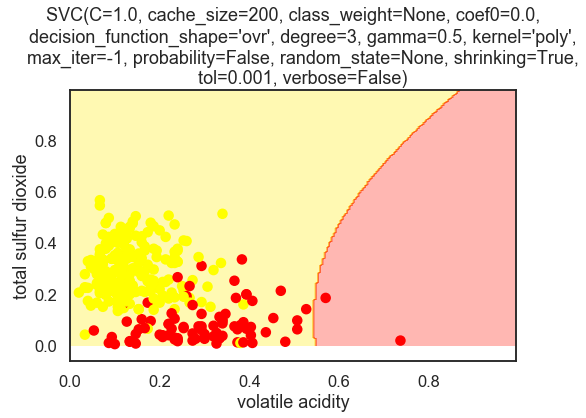

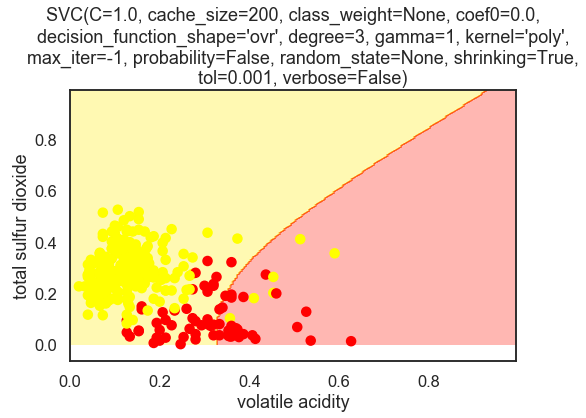

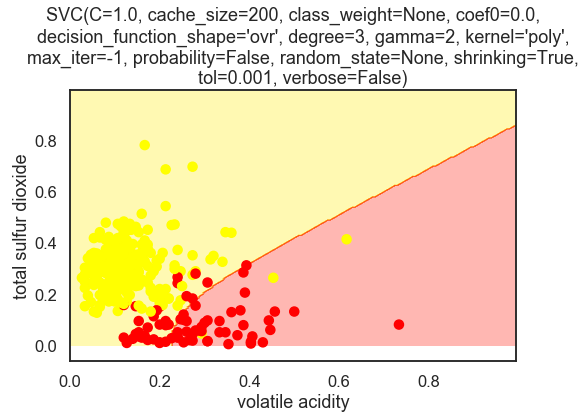

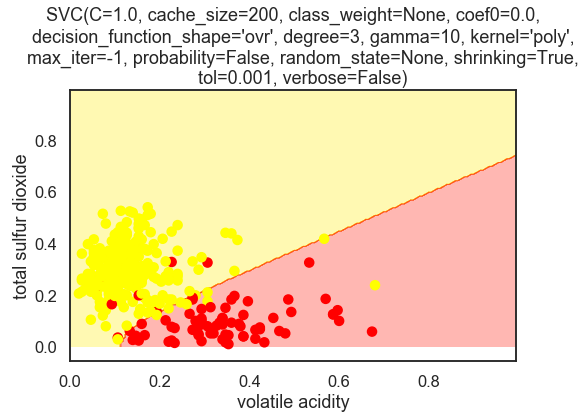

In [31]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Polynomial = SVC(kernel='poly', gamma=gamma)
    plot_decision_boundary(SVC_Polynomial, X, y)

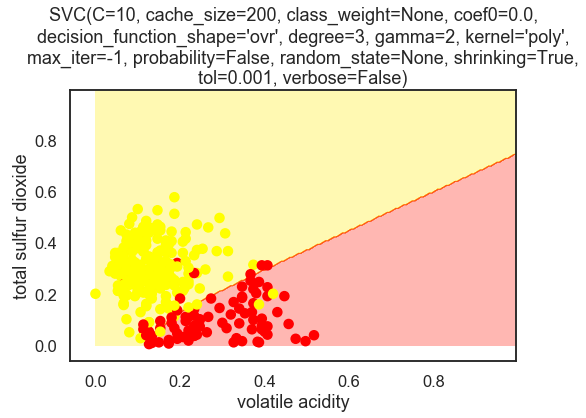

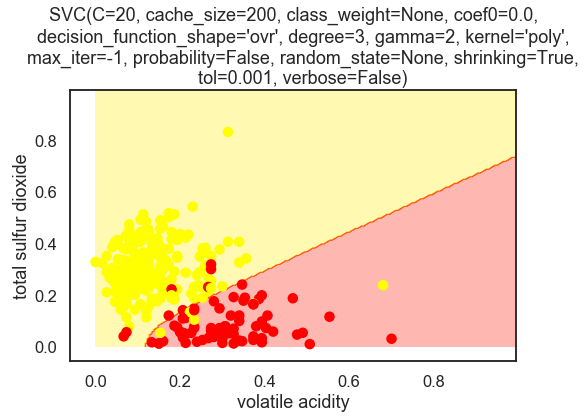

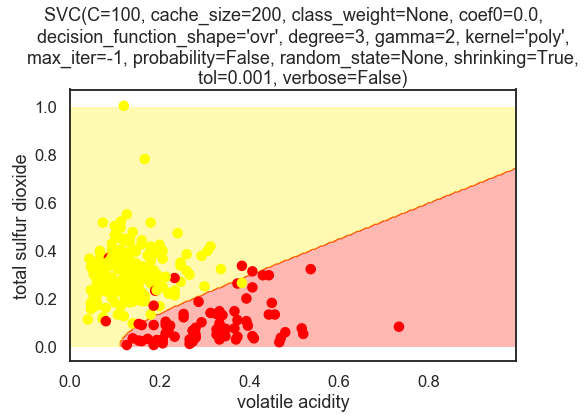

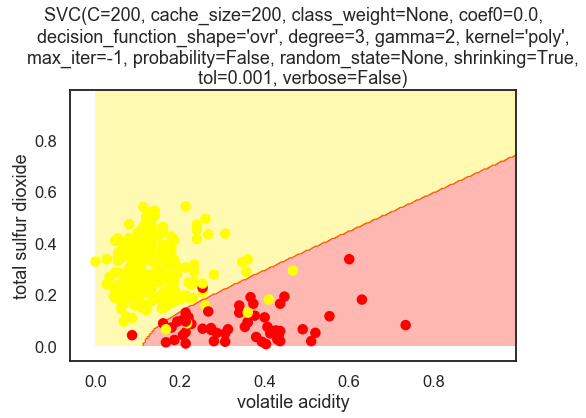

In [32]:
Cs = [10,20,100,200]
for C in Cs:
    SVC_Polynomial = SVC(kernel='poly', gamma=2, C=C)
    plot_decision_boundary(SVC_Polynomial, X, y)

In [33]:
param_grid = {'C': [10, 20, 100, 200],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.927, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.942, total=   0.0s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ......... C=10, gamma=10, kernel=poly, score=0.933, total=   0.0s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.912, total=   0.0s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.930, total=   0.0s
[CV] C=10, gamma=2, kernel=poly ......................................
[CV] .......... C=10, gamma=2, kernel=poly, score=0.922, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 20, 100, 200], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [34]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 100, 'gamma': 2, 'kernel': 'poly'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [35]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1447
           1       0.94      0.78      0.85       503

    accuracy                           0.93      1950
   macro avg       0.93      0.88      0.90      1950
weighted avg       0.93      0.93      0.93      1950



## Sigmoid Kernel :

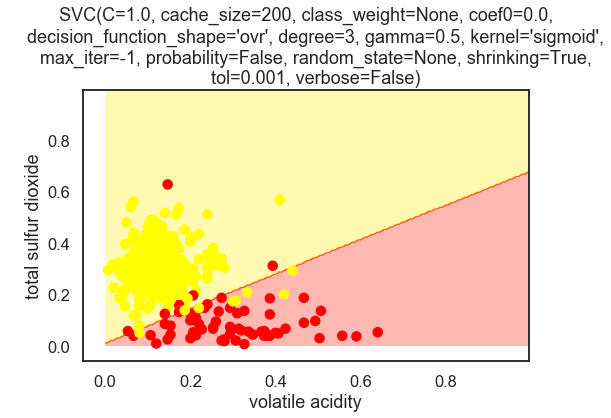

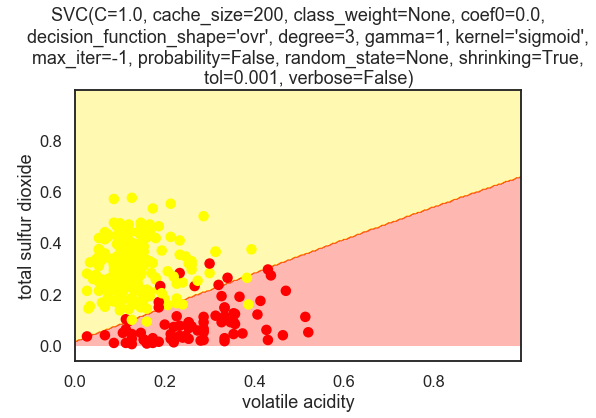

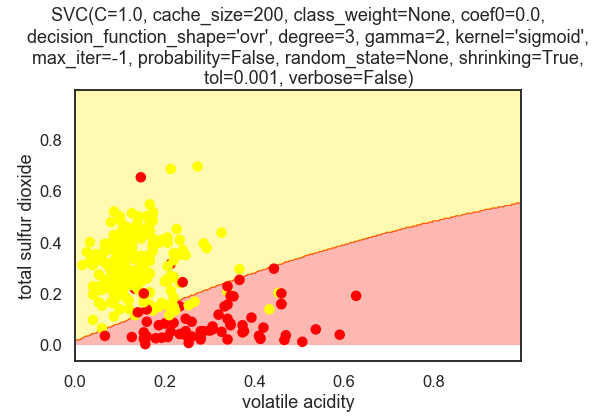

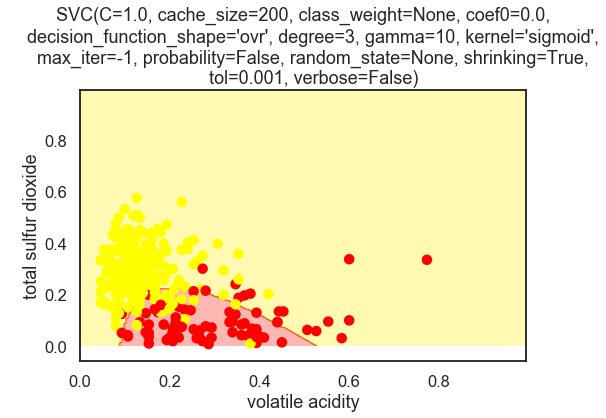

In [36]:
gammas = [0.5, 1, 2, 10]
for gamma in gammas:
    SVC_Sigmoid = SVC(kernel='sigmoid', gamma=gamma)
    plot_decision_boundary(SVC_Sigmoid, X, y)

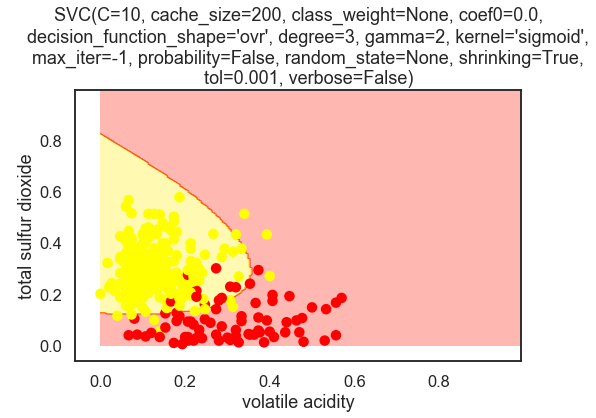

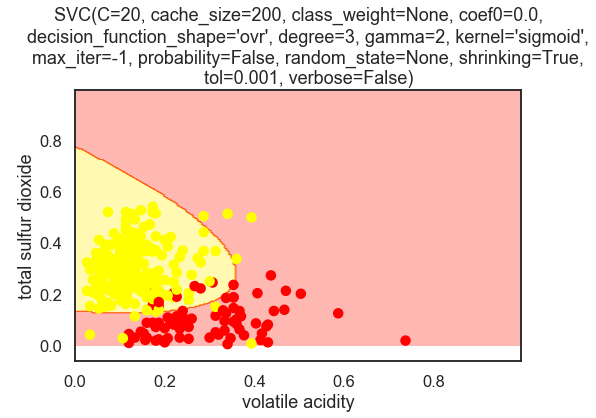

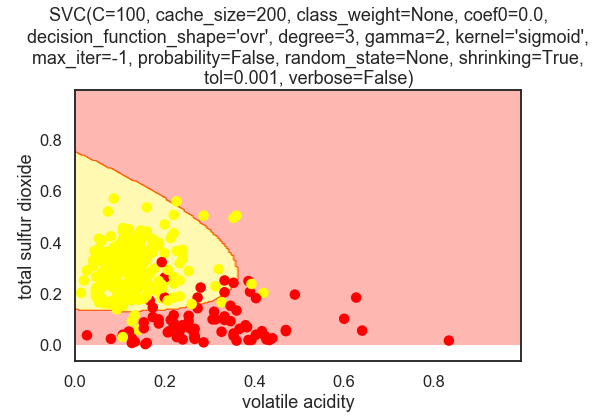

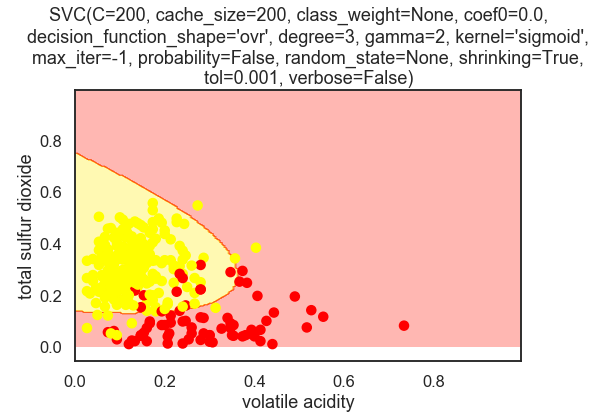

In [37]:
Cs = [10,20,100,200]
for C in Cs:
    SVC_Sigmoid = SVC(kernel='sigmoid', gamma=2, C=C)
    plot_decision_boundary(SVC_Sigmoid, X, y)

In [38]:
param_grid = {'C': [10, 20, 100, 200],  
              'gamma': [10, 2, 1, 0.5], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.893, total=   0.0s
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.882, total=   0.0s
[CV] C=10, gamma=10, kernel=sigmoid ..................................
[CV] ...... C=10, gamma=10, kernel=sigmoid, score=0.902, total=   0.0s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.949, total=   0.0s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.947, total=   0.0s
[CV] C=10, gamma=2, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=2, kernel=sigmoid, score=0.948, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 20, 100, 200], 'gamma': [10, 2, 1, 0.5],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.5, 'kernel': 'sigmoid'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [40]:
grid_predictions = grid.predict(X_test) 
  
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1447
           1       0.93      0.90      0.91       503

    accuracy                           0.96      1950
   macro avg       0.95      0.94      0.94      1950
weighted avg       0.96      0.96      0.96      1950



# SVM RBF :

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('accuracy=',svm.score(X_test,y_test)*100,"%")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

accuracy= 95.64102564102565 %
[[1415   32]
 [  53  450]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1447
           1       0.93      0.89      0.91       503

    accuracy                           0.96      1950
   macro avg       0.95      0.94      0.94      1950
weighted avg       0.96      0.96      0.96      1950



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
from sklearn.metrics import confusion_matrix
def plot_ConfusionMatrix(y_test,y_pred):
    plt.title('Confusion Matirx')
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix,annot=True,xticklabels=['N', 'Y'],yticklabels=['N', 'Y'],fmt='.5g')

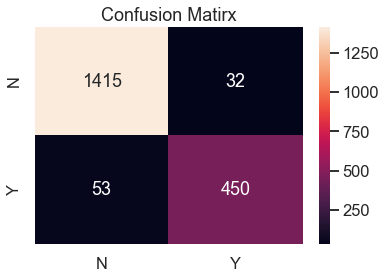

In [51]:
plot_ConfusionMatrix(y_test,y_pred)

# Cross-validation: evaluating estimator performance

In [87]:
DATAPATH = ('D:/ex6data3.mat')
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (20., 14.)
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

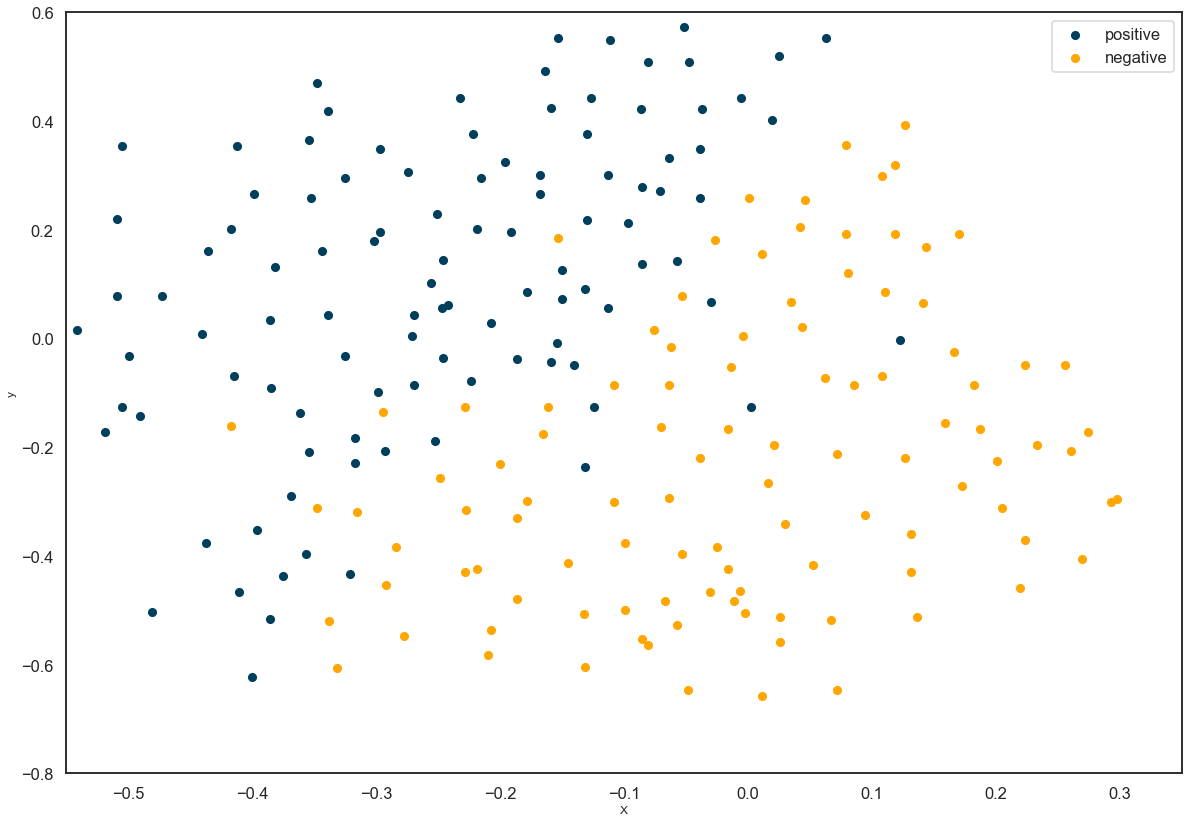

In [90]:
data = loadmat(DATAPATH)
X_3 = data['X']
y_3 = data['y']

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

In [92]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X_3, y_3.ravel())
        errors.append(clf.score(data['Xval'], data['yval'].ravel()))
        sigma_c.append((each, each_c))

In [93]:
index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is: {}'.format(sigma_max))
print('The optimal value of C is: {}'.format(c_max))

The optimal value of sigma is: 0.1
The optimal value of C is: 1


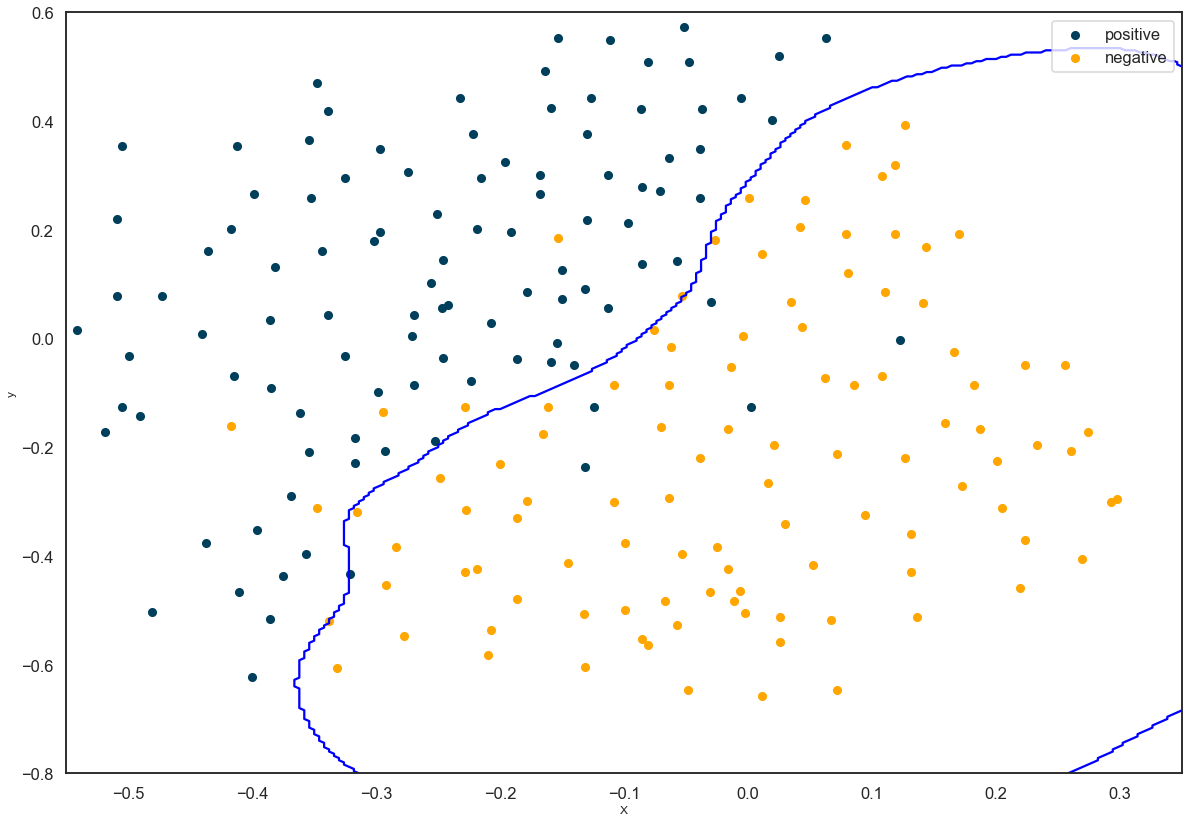

In [94]:
sigma= 0.1
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# Spam Classification using SVM :

In [85]:
from sklearn import svm
from scipy.io import loadmat
DATA_SPAM_TRAIN = ('D:/spamTrain.mat')
DATA_SPAM_TEST = ('D:/spamTest.mat')

In [86]:
spam_train = loadmat(DATA_SPAM_TRAIN)
spam_test = loadmat(DATA_SPAM_TEST)

C = 0.1

X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

clf_spam = svm.SVC(kernel = 'linear', C = 0.1, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9


# Conclusion :

## We have performed Support Vector Machines using five different kernels.

## Also performed Cross-validation and spam classifiaction using SVM.

## We also acquired great accuracy and plotted decision decision boundary for visualization.